In [24]:
import pandas as pd, numpy as np, os



import seaborn as sns
import matplotlib.pyplot as plt
#import math, os

import sys, scipy, random

sys.path.append(os.getcwd())
from func import *


In [2]:
path = r'C:\Users\zhany\OneDrive - University of Nebraska-Lincoln\BoxMigrationUNL\Code_Program\Soybean\\semi_daily_ADMM\\leaf area vs z_tilde\\control random sampling\\adaptive cusum\\thre_1.08_semi_daily\\'
data_path = r'C:\Users\zhany\Box Sync\Code_Program\Soybean\semi_daily_ADMM\leaf area vs z_tilde\data_thre_1.08'
os.chdir(path)

In [3]:
spline_df = pd.read_csv(data_path +r'\daily_UnivariateSpline_df.csv')


In [4]:
spline_control = spline_df[spline_df['Treatment'] == 'control'].sort_values(['Plant.ID', 'Lag']).copy()
spline_drought = spline_df[spline_df['Treatment'] == 'drought'].sort_values(['Plant.ID', 'Lag']).copy()
drought_ID = np.unique(spline_drought['Plant.ID'])
drought_Lag = np.unique(spline_drought['Lag'])
control_ID = np.unique(spline_control['Plant.ID'])
control_Lag = np.unique(spline_control['Lag'])

In [5]:
spline_control.sort_values(['Lag', 'Plant.ID']).head()

,Unnamed: 0,Plant.ID,Lag,Smooth.Predicted.Leaf.Area,Treatment,Leaf Area Growth Rate,rate_avg,std_z,z,z_tilde,g_avg,std_g,g,g_tilde
0,1,574,0.3188,247.401166,control,NaN,NaN,NaN,NaN,NaN,208.490884,38.736018,38.910282,1.004499
2,41,576,0.3188,197.520802,control,NaN,NaN,NaN,NaN,NaN,208.490884,38.736018,-10.970083,-0.283201
4,81,578,0.3188,253.547879,control,NaN,NaN,NaN,NaN,NaN,208.490884,38.736018,45.056994,1.163181
6,121,580,0.3188,155.667348,control,NaN,NaN,NaN,NaN,NaN,208.490884,38.736018,-52.823537,-1.363680
8,177,582,0.3188,223.174970,control,NaN,NaN,NaN,NaN,NaN,208.490884,38.736018,14.684086,0.379081


In [6]:
spline_control.head()

,Unnamed: 0,Plant.ID,Lag,Smooth.Predicted.Leaf.Area,Treatment,Leaf Area Growth Rate,rate_avg,std_z,z,z_tilde,g_avg,std_g,g,g_tilde
0,1,574,0.3188,247.401166,control,NaN,NaN,NaN,NaN,NaN,208.490884,38.736018,38.910282,1.004499
99,2,574,0.8188,272.284854,control,0.100580,0.112860,0.047695,-0.012280,-0.257463,231.540615,42.518788,40.744239,0.958264
198,3,574,1.3188,295.862394,control,0.086591,0.118307,0.033208,-0.031716,-0.955055,258.536533,46.350894,37.325861,0.805289
297,4,574,1.8188,318.813165,control,0.077572,0.119749,0.032982,-0.042176,-1.278743,289.133327,50.678142,29.679838,0.585654
396,5,574,2.3188,341.816545,control,0.072153,0.117748,0.032154,-0.045595,-1.418008,322.985687,56.324609,18.830859,0.334327


# z_tilde

In [25]:
control_z = pd.read_csv(data_path + r'\daily_z_tilde_control_list.csv',  header= None)
control_z .head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,NaN,-0.257463,-0.955055,-1.278743,-1.418008,-1.576136,-1.802190,-1.952753,-1.484488,-0.954871,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.303806,0.603990,0.560401,0.417051,0.228739,-0.076554,-0.606028,-1.086313,-1.258140,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,-0.062706,-1.556585,-2.302554,-2.563766,-2.676528,-2.568922,-1.759545,0.016188,1.001403,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,0.171425,0.729004,0.882614,0.855023,0.786885,0.658167,0.347268,-0.142898,-0.301002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,0.675413,0.351469,-0.039308,-0.258669,-0.409443,-0.560369,-0.694853,-0.603400,-0.465696,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Generate more control samples -Simulation

In [26]:
nsample = 10000
ncol = control_z.shape[1]
random.seed(42)
sample_z = np.zeros((nsample, ncol))

for i in range(1, ncol):
    sample_z[:, i] = random.choices(control_z.iloc[:, i].dropna().tolist(), k = nsample)
#sample_z[0]

In [27]:
sample_z

array([[ 0.        , -0.44977411, -0.79304769, ...,  0.28357829,
        -0.66803094,  0.74650303],
       [ 0.        ,  0.30380589, -1.6812551 , ..., -0.06400899,
         0.53092699,  0.25979379],
       [ 0.        , -0.6984189 ,  0.94266184, ...,  0.17634359,
        -2.15488565, -2.09429621],
       ...,
       [ 0.        , -0.50984498,  0.23765339, ...,  0.39104491,
         0.31275912, -0.51462319],
       [ 0.        , -1.51455431, -1.50118815, ...,  0.10142639,
        -0.13442128,  0.56380148],
       [ 0.        ,  0.17142537,  1.773098  , ..., -0.35362937,
        -0.66803094,  1.80543431]])

In [28]:
target = 60

In [29]:
spline_control["z_tilde"] = spline_control["z_tilde"].fillna(0)
spline_drought["z_tilde"] = spline_drought["z_tilde"].fillna(0)
spline_drought

,Unnamed: 0,Plant.ID,Lag,Smooth.Predicted.Leaf.Area,Treatment,Leaf Area Growth Rate,rate_avg,std_z,z,z_tilde,g_avg,std_g,g,g_tilde,-1,-2,-1_bar
1,21,575,0.3188,180.108925,drought,NaN,NaN,NaN,NaN,0.000000,208.490884,38.736018,-28.381959,-0.732702,0.000000,0.000000,-1.000000
100,22,575,0.8188,201.452124,drought,0.118502,0.112860,0.047695,0.005642,0.118285,231.540615,42.518788,-30.088491,-0.707652,0.000000,0.000000,-1.000000
199,23,575,1.3188,225.587612,drought,0.119808,0.118307,0.033208,0.001500,0.045175,258.536533,46.350894,-32.948921,-0.710858,0.000000,0.000000,-1.000000
298,24,575,1.8188,252.538915,drought,0.119472,0.119749,0.032982,-0.000277,-0.008398,289.133327,50.678142,-36.594412,-0.722095,0.000000,0.000000,-1.000000
397,25,575,2.3188,282.329563,drought,0.117965,0.117748,0.032154,0.000217,0.006737,322.985687,56.324609,-40.656123,-0.721818,0.000000,0.000000,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4618,5064,671,25.8188,3271.655871,drought,0.063528,0.041939,0.013643,0.021589,1.582414,8417.475627,1045.406963,-5145.819756,-4.922312,63.856024,82.622247,-1.756057
4682,5065,671,26.3188,3475.421032,drought,0.062282,0.037158,0.007267,0.025124,3.457421,8722.445856,1123.502629,-5247.024824,-4.670238,56.610526,73.707405,-1.685026
4746,5066,671,26.8188,3682.487460,drought,0.059580,0.036255,0.007478,0.023326,3.119040,9038.033025,1164.119855,-5355.545565,-4.600510,50.444148,65.469325,-1.577891
4810,5067,671,27.3188,3887.819131,drought,0.055759,0.034970,0.007995,0.020789,2.600291,9353.275297,1202.990700,-5465.456166,-4.543224,45.492210,58.268743,-1.482036


# Cusum

In [30]:
theta = [-1, -2]
control_result_dic = sim_control_cusum(sample_z, theta, target = target, tol = 0.5)

-1
0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
250.0
125.0
62.5
31.25
15.625
7.8125
3.90625
5.859375
4.8828125
4.39453125
--- 1.747328281402588 seconds ---
-2
0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
250.0
125.0
62.5
31.25
15.625
7.8125
3.90625
5.859375
4.8828125
5.37109375
--- 3.4098825454711914 seconds ---


In [31]:
for the in  theta:
    print("theta %.2f | threshold %.4f | ARL  %.2f | SE %.2f" %(the, control_result_dic[the]['b'], control_result_dic[the]['mean'], control_result_dic[the]['se']))

theta -1.00 | threshold 4.3945 | ARL  59.44 | SE 0.10
theta -2.00 | threshold 5.3711 | ARL  58.99 | SE 0.10


In [32]:
drought_result_dic, spline_drought1= treatment_cusum(spline_drought, 'Plant.ID', 'z_tilde', theta, control_result_dic)

-1
0
--- 0.00603175163269043 seconds ---
-2
0
--- 0.008974313735961914 seconds ---


In [33]:
for the in  theta:
    print("theta %.2f | threshold %.4f | ARL  %.2f | SE %.2f" %(the, drought_result_dic[the]['b'], drought_result_dic[the]['mean'], drought_result_dic[the]['se']))

theta -1.00 | threshold 4.3945 | ARL  22.82 | SE 1.15
theta -2.00 | threshold 5.3711 | ARL  24.04 | SE 1.12


In [34]:
drought_alarm_z = dic_index_to_alarm_time( theta, drought_result_dic, drought_ID, drought_Lag)
drought_alarm_z.mean()

-1_Alarm    11.726869
-2_Alarm    12.339114
dtype: float64

In [35]:
drought_alarm_z.sem()

-1_Alarm    0.574150
-2_Alarm    0.560147
dtype: float64

# Adaptive CUSUM

In [36]:
delta = [-1]

control_result_dic = sim_control_adaptive_cusum(sample_z, delta, target = target, tol = 0.5)

-1
0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
250.0
125.0
62.5
31.25
15.625
7.8125
3.90625
5.859375
4.8828125
4.39453125
4.150390625
--- 2.507814407348633 seconds ---


In [37]:

for dta in  delta:
    print("delta %.3f | threshold %.4f | ARL  %.2f | SE %.2f" %(dta, control_result_dic[dta]['b'], control_result_dic[dta]['mean'], control_result_dic[dta]['se']))

delta -1.000 | threshold 4.1504 | ARL  59.14 | SE 0.11


In [38]:
drought_result_dic, spline_drought1= treatment_adaptive_cusum(spline_drought, 'Plant.ID', 'z_tilde', delta, control_result_dic)
#drought_result_dic = sim_treatment_adaptive_cusum(drought_z_arr, [-1.0], control_result_dic)

-1
0
44
--- 0.024975299835205078 seconds ---


In [39]:
control_result_dic1, spline_control1= treatment_adaptive_cusum(spline_control, 'Plant.ID', 'z_tilde', delta, control_result_dic)

-1
0
36
--- 0.008966922760009766 seconds ---


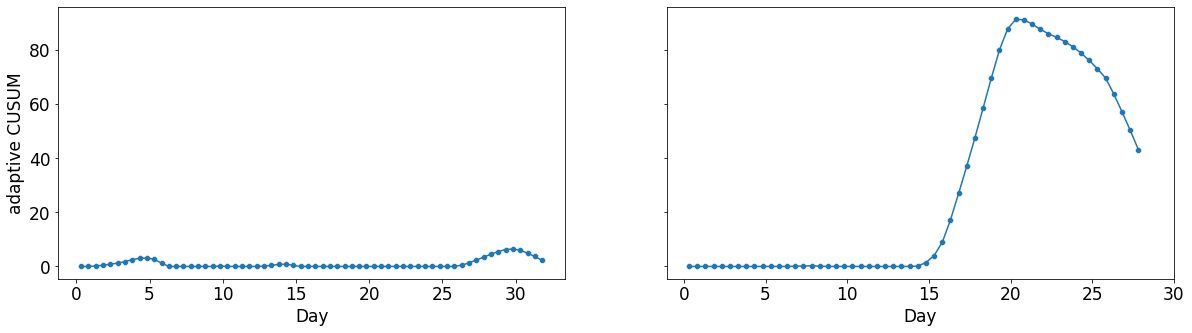

In [40]:
size = 17
#fig, (ax1, ax2) = plt.subplots(nrows=2, sharex = True, figsize = (16, 8))
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (20, 5), sharey = True)
df1 = spline_control1[spline_control1['Plant.ID'] == 666]
df2 = spline_drought1[spline_drought1['Plant.ID'] == 669]

sns.lineplot(x = 'Lag', y = df1[-1],  data = df1, ax = ax1)
sns.scatterplot(x = 'Lag', y = df1[-1],  data = df1, ax = ax1)
ax1.set_ylabel('adaptive CUSUM', fontsize = size )
ax1.set_xlabel('Day', fontsize = size )
ax1.set_xticks(np.arange(0, 31+1, 5.0))
ax1.tick_params( labelsize=size)

sns.lineplot(x = 'Lag', y = df2[-1],  data = df2, ax = ax2)
sns.scatterplot(x = 'Lag', y = df2[-1],  data = df2, ax = ax2)
#ax2.set_ylabel('ACF', fontsize = size )
ax2.set_xlabel('Day', fontsize = size )
ax2.set_xticks(np.arange(0, 31+1, 5.0))
ax2.get_figure().suptitle('')
ax2.get_figure().gca().set_title("")
ax2.tick_params( labelsize=size)
plt.show()




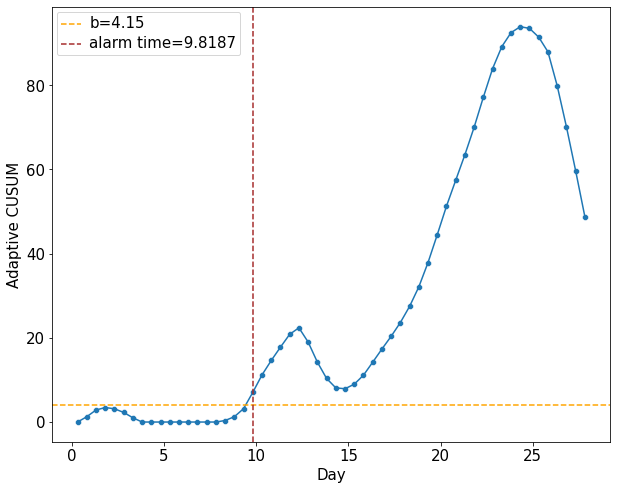

In [41]:
plt.figure(figsize=(10, 8))


df2 = spline_drought1[spline_drought1['Plant.ID'] == 667]



ax1.set_xticks(np.arange(0, 31+1, 5.0))

fg = sns.lineplot(x = df2['Lag'], y = df2[-1], data =df2)#, data = spline_df)
sns.scatterplot(x = df2['Lag'], y = df2[-1], data =df2)
plt.ylabel('Adaptive CUSUM', fontsize = 15 )
plt.xlabel('Day', fontsize = 15 )
plt.axhline(4.15, linestyle='--', color='orange',  label='b=4.15')
alarm_time=df2[df2[-1]>4.15]['Lag'].reset_index(drop=True)[0]
plt.axvline(alarm_time, linestyle='--', color='brown',  \
            label='alarm time='+str(df2[df2[-1]>4.15]['Lag'].reset_index(drop=True)[0]))

plt.tick_params( labelsize=15)
plt.legend(loc ='upper left')

plt.setp(fg.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(fg.get_legend().get_title(), fontsize='15') # for legend title

plt.show()


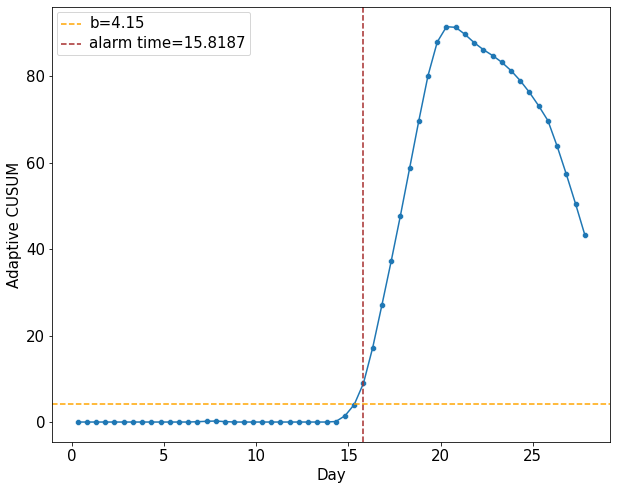

In [42]:
plt.figure(figsize=(10, 8))


df2 = spline_drought1[spline_drought1['Plant.ID'] == 669]



ax1.set_xticks(np.arange(0, 31+1, 5.0))

fg = sns.lineplot(x = df2['Lag'], y = df2[-1], data =df2)#, data = spline_df)
sns.scatterplot(x = df2['Lag'], y = df2[-1], data =df2)
plt.ylabel('Adaptive CUSUM', fontsize = 15 )
plt.xlabel('Day', fontsize = 15 )
plt.axhline(4.15, linestyle='--', color='orange',  label='b=4.15')
alarm_time=df2[df2[-1]>4.15]['Lag'].reset_index(drop=True)[0]
plt.axvline(alarm_time, linestyle='--', color='brown',  \
            label='alarm time='+str(df2[df2[-1]>4.15]['Lag'].reset_index(drop=True)[0]))

plt.tick_params( labelsize=15)
plt.legend(loc ='upper left')

plt.setp(fg.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(fg.get_legend().get_title(), fontsize='15') # for legend title

plt.show()


In [43]:

for dta in  delta:
    print("delta %.2f | threshold %.4f | ARL  %.2f | SE %.2f" %(dta, drought_result_dic[dta]['b'], drought_result_dic[dta]['mean'], drought_result_dic[dta]['se']))

delta -1.00 | threshold 4.1504 | ARL  22.14 | SE 1.17


In [44]:
df = pd.DataFrame.from_dict(drought_result_dic, orient="index")

In [45]:
drought_alarm_z = dic_index_to_alarm_time( delta, drought_result_dic, drought_ID, drought_Lag)
drought_alarm_z.mean()

-1_Alarm    11.390135
dtype: float64

In [46]:
drought_alarm_z.sem()

-1_Alarm    0.583574
dtype: float64